Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        def li(x, i):
            vec = np.hstack((x[:i], x[i + 1:]))
            return lambda t: np.prod((t - vec)/(x[i] - vec))
        return np.sum(self.yk * np.array([li(self.xk, i)(x) for i in range(self.xk.shape[0])]))

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


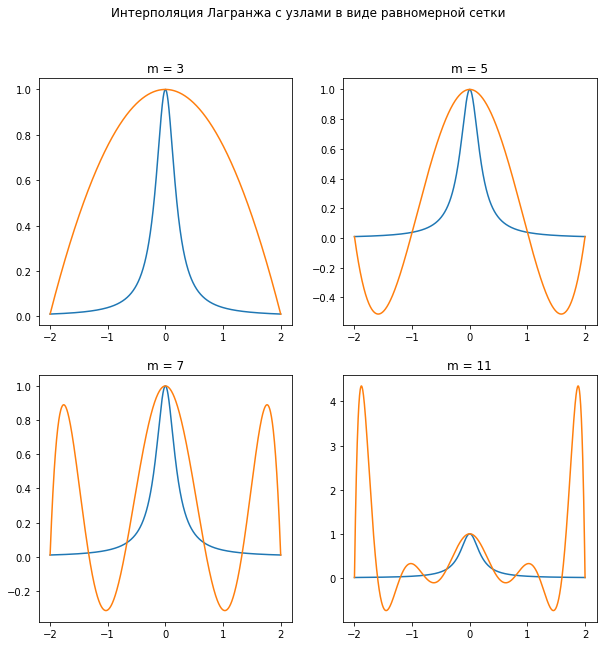

In [4]:
import matplotlib.pyplot as plt

runge_func = lambda t: 1 / (1 + 25 * t**2)
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
x = np.linspace(-2, 2, 1000)
for i, m in enumerate([3, 5, 7, 11]):
    grid = np.linspace(-2, 2, m)
    lp = LagrangeInterpolator(grid, runge_func(grid))
    ax[i//2, i%2].plot(x, runge_func(x))
    ax[i//2, i%2].plot(x, [lp(el) for el in x])
    ax[i//2, i%2].set_title(f'm = {m}')
fig.suptitle('Интерполяция Лагранжа с узлами в виде равномерной сетки');

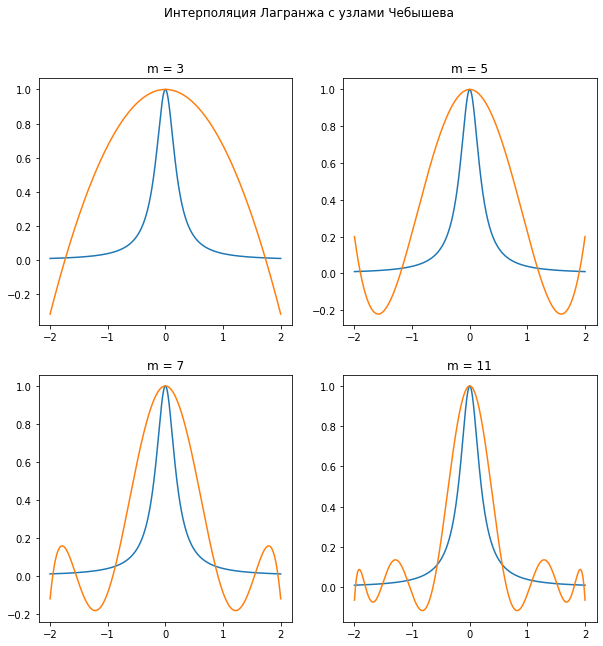

In [5]:
import matplotlib.pyplot as plt

runge_func = lambda t: 1 / (1 + 25 * t**2)
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
x = np.linspace(-2, 2, 1000)
for i, m in enumerate([3, 5, 7, 11]):
    grid = np.cos(np.arange(1, 2*m, 2) / (2 * m) * np.pi) * 2
    lp = LagrangeInterpolator(grid, runge_func(grid))
    ax[i//2, i%2].plot(x, runge_func(x))
    ax[i//2, i%2].plot(x, [lp(el) for el in x])
    ax[i//2, i%2].set_title(f'm = {m}')
fig.suptitle('Интерполяция Лагранжа с узлами Чебышева');

Очевидно, для узлов Чебышева интерполяция оказалась качественнее